In [1]:
import numpy as np
from colorsys import hls_to_rgb
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

from fastqaoa.indicator import get_indicator_interpolator, interpolate_diagonals
from fastqaoa.utils import styling
styling.set_my_style()

In [2]:
M = 4
interp = get_indicator_interpolator(M=M, subdiv=4, shift=0)

In [3]:
Nx = 200
Ny = 200


g = np.linspace(-1- 1 / 2 ** M, 1 - 1 / 2 ** M , Nx)
th = interp(g)
yf = np.linspace(-np.pi, np.pi, Ny)

func = lambda yf, th: (np.exp(1j * yf[None, :]) + 1) * 0.5 + 0.5 *(np.exp(1j * yf[None, :]) - 1) * th[:, None]

x = func(yf, th)

In [4]:
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r)
    s = 0.6

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    print(c.shape)
    c = c.swapaxes(0, 2)
    return c.swapaxes(0, 1)

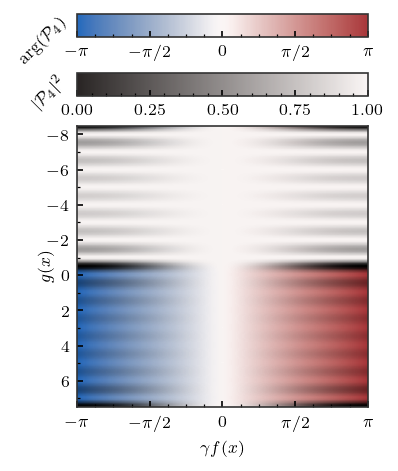

In [5]:
fig, ax = styling.subplots(figsize=(2.5, 3.4))
ax.set_facecolor("black")

palette=sns.color_palette("vlag", as_cmap=True)
ax.imshow(np.angle(x), extent=[yf[0], yf[-1],  2**(M-1) - 0.5, -2**(M-1) - 0.5,], aspect="auto", cmap=palette, alpha=np.clip(np.abs(x) ** 2, 0, 1))
# ax.contourf(np.angle(x))

# ax.contour(np.angle(x), extent=[g[0], g[-1], yf[0], yf[-1]], colors="black", linestyles="-")
ax.set_ylabel(r"$g(x)$", labelpad=-3)

# ax.set_xticks(np.arange(-1, 1.25, 0.25), ["-1", r"$-\frac{3}{4}$", r"$-\frac{1}{2}$", r"$-\frac{1}{4}$", "-1", r"$-\frac{3}{4}$", r"$-\frac{1}{2}$", r"$-\frac{1}{4}$", "1"])
ax.set_xlabel(r"$\gamma f(x)$")
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')

ax.set_xticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi / 2), [r"$-\pi$", r"$-\pi / 2$", "0", r"$\pi/2$", r"$\pi$"])
ax.yaxis.set_minor_locator(MultipleLocator(1))

divider = make_axes_locatable(ax)
# sub_ax1 = fig.add_axes([0.95, 0.1, 0.03, 1])
# cax2 = divider.append_axes('right', size='5%', pad=0.2)
#

vcolor = sns.color_palette("vlag", 3)[1]

cax1 = divider.append_axes('top', size='8%', pad=0.2)
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cm = mpl.cm.ScalarMappable(norm=norm, cmap=sns.dark_palette(vcolor, as_cmap=True))
plt.colorbar(cm, cax=cax1, orientation="horizontal")
cax1.set_ylabel(r"$|\mathcal{P}_4|^2$", rotation=45, ha="right")
cax1.set_xticks([0, 0.75, 0.5, 0.25, 1])

cax2 = divider.append_axes('top', size='8%', pad=0.24)
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
cm = mpl.cm.ScalarMappable(norm=norm, cmap=palette)
plt.colorbar(cm, cax=cax2, orientation="horizontal")
cax2.set_ylabel(r"$\arg(\mathcal{P}_4)$", rotation=45, ha="right")
cax2.set_xticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi / 2), [r"$-\pi$", r"$-\pi / 2$", "0", r"$\pi/2$", r"$\pi$"])

cax1.grid(which="both", visible=False)
cax2.grid(which="both", visible=False)
ax.grid(which="both", visible=False)

plt.savefig("plots/if_nonunitary_operation.pdf", bbox_inches="tight")

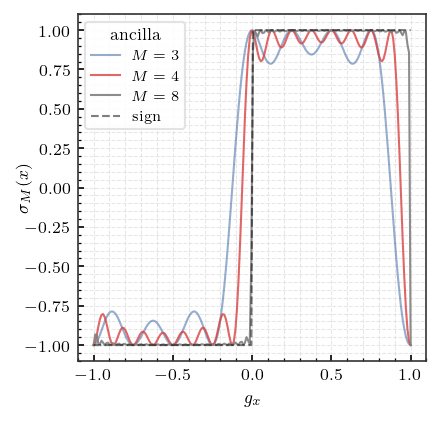

In [6]:
plt.subplots(figsize=(3, 3))

sns.set_palette("colorblind")

g = np.linspace(-1, 1, Nx)

interp = get_indicator_interpolator(M=3, subdiv=4, shift=0)
plt.plot(g, interp(g), label="$M=3$", alpha=0.5)
interp = get_indicator_interpolator(M=4, subdiv=4, shift=0)
plt.plot(g, interp(g), label="$M=4$", alpha=0.8)
interp = get_indicator_interpolator(M=8, subdiv=4, shift=0)
plt.plot(g, interp(g), label="$M=8$", alpha=0.9)

plt.plot(g, np.sign(g), color="k", label=r"$\mathrm{sign}$", linestyle="dashed", alpha=0.5)

plt.legend(title="ancilla")
plt.ylabel(r"$\sigma_M(x)$", labelpad=-3)
plt.xlabel("$g_x$")

plt.savefig("plots/if_sign.pdf", bbox_inches="tight")

In [7]:
def mean_prob(M, r=100):
    interp = get_indicator_interpolator(M=M, subdiv=4, shift=0)
    x = np.exp(-1j * np.linspace(0, 2*np.pi, r))
    x = x[:, None]
    y = interp(np.linspace(-1, 1, r))[None, :]

    return np.mean(np.abs(0.5 * (x + 1) + 0.5 * (x - 1) * y) ** 2)

Text(0, 0.5, '$\\langle q \\rangle = \\langle |\\mathcal{P}_M |^2 \\rangle $')

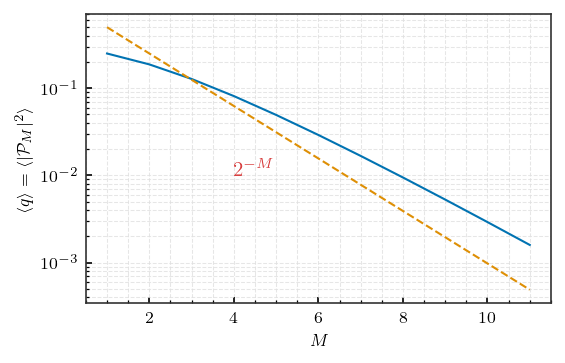

In [8]:
Ms = np.arange(1, 12)

plt.plot(Ms, [1-mean_prob(m, r=1 << 12) for m in Ms])

plt.yscale("log")

plt.plot(Ms, 1 / 2**Ms, linestyle="dashed")
plt.text(x=4, y=1e-2, s=r"$2^{-M}$", color=styling.COLORS[1])

plt.xlabel("$M$")

plt.ylabel(r"$\langle q \rangle = \langle |\mathcal{P}_M |^2 \rangle $")